In [1]:
from CubicalComplex import *

In [2]:
cells = CubicalGrid([range(0,10),range(0,10)])
cells.remove(CubicalCell(((4,5),(4,5))))
CC = CubicalComplex(cells)

## Testing CubicalComplex

In [3]:
cells = CC.cells()
for cell in cells:
    print("=========================")
    print(cell)
    print(cell.dimension())
    

(7,8)x(7,8)
2
(5,6)x{7}
1
(7,8)x{1}
1
{8}x{6}
0
(2,3)x(5,6)
2
(2,3)x(1,2)
2
{6}x(3,4)
1
(2,3)x(3,4)
2
(1,2)x{5}
1
(2,3)x(4,5)
2
(7,8)x{7}
1
{2}x{7}
0
{5}x(7,8)
1
(6,7)x{6}
1
{4}x{5}
0
(4,5)x(0,1)
2
(3,4)x(6,7)
2
{0}x{4}
0
(1,2)x{6}
1
{7}x{6}
0
{0}x{8}
0
{2}x{9}
0
(5,6)x{5}
1
{3}x{0}
0
(2,3)x{2}
1
(0,1)x(1,2)
2
{9}x{0}
0
(8,9)x(2,3)
2
{8}x(6,7)
1
{2}x{3}
0
(5,6)x{6}
1
(3,4)x{8}
1
{4}x{7}
0
(3,4)x{4}
1
{8}x{1}
0
(5,6)x{4}
1
(6,7)x(6,7)
2
(1,2)x{9}
1
(2,3)x{1}
1
(5,6)x{8}
1
{0}x(7,8)
1
{9}x(5,6)
1
(5,6)x(3,4)
2
{6}x{4}
0
{6}x{1}
0
{3}x(4,5)
1
{0}x{3}
0
{2}x(6,7)
1
(7,8)x(6,7)
2
{8}x{8}
0
{3}x(8,9)
1
{5}x{4}
0
(6,7)x{3}
1
{6}x{6}
0
{5}x{8}
0
(1,2)x{3}
1
(2,3)x{9}
1
{4}x(6,7)
1
{0}x(6,7)
1
(1,2)x{2}
1
(1,2)x(3,4)
2
(3,4)x(8,9)
2
{2}x(7,8)
1
(3,4)x(3,4)
2
{9}x{3}
0
(3,4)x(4,5)
2
(4,5)x{8}
1
(1,2)x(8,9)
2
(0,1)x{2}
1
(4,5)x(3,4)
2
(5,6)x{3}
1
{5}x(5,6)
1
(6,7)x{1}
1
{2}x{1}
0
{6}x(1,2)
1
{4}x{9}
0
(0,1)x{7}
1
(2,3)x(0,1)
2
{6}x{8}
0
{7}x{1}
0
{3}x(3,4)
1
{8}x{4}
0
(0,1)x(7,8)
2
(4,5)x{2}
1
{0

## Testing MorseMatching

In [4]:
from MorseMatching import *

In [5]:
M = MorseMatching(CC)

## Testing MorseMatchingHomotopy
Morse matching seems to work but the proof is in the pudding of course

In [6]:
from MorseMatchingHomotopy import *

In [7]:
(critical_cells, homotopy) = MorseMatchingHomotopy(M, CC)

In [8]:
print(critical_cells)

[((6, 6), (4, 5)), ((3, 3), (4, 4))]


## Testing Morse Complex

The critical cells look good. Let's try out this homotopy and see if it gives me a nice complex

In [9]:
from MorseComplex import *

In [10]:
MC = MorseComplex(CC, critical_cells, homotopy)

In [11]:
print([cell for cell in MC])

[((6, 6), (4, 5)), ((3, 3), (4, 4))]


In [12]:
print([cell.dimension() for cell in MC])

[1, 0]


## Testing Braids

In [13]:
from Braids import *

In [14]:
braid_skeleton = [ [1,4,1,4], [2,2,2,2], [3,3,3,3], [4,1,4,1]]
(complex, discrete_flow) = Braids(braid_skeleton)

## Testing ConleyMorseFibration

In [15]:
from ConleyMorseFibration import *

In [16]:
fibration = ConleyMorseFibration(complex, discrete_flow)

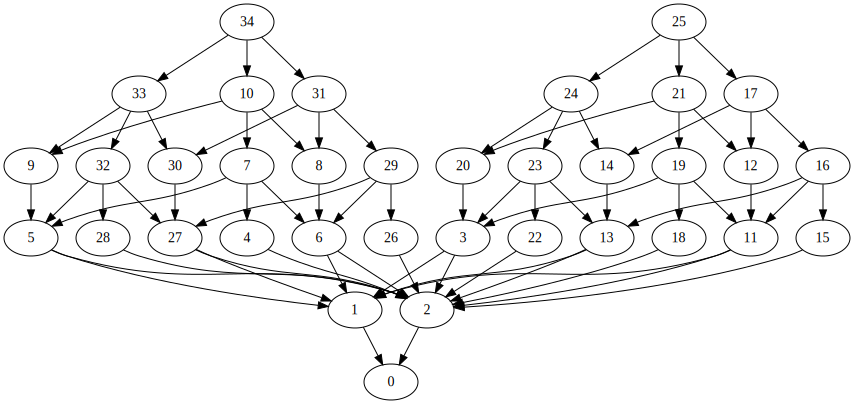

In [17]:
fibration.poset()

In [18]:
simple_complex = CubicalComplex(CubicalGrid([[1,2,3],[1,2,3]]))
D = [ cell for cell in simple_complex.cells() if cell.dimension() == simple_complex.dimension()]
edges = defaultdict(set, { D[0] : [D[2], D[3]], D[2] : [D[1]], D[3] : [D[1]] })
discrete_flow = lambda v : edges[v]
simple_fibration = ConleyMorseFibration(simple_complex, discrete_flow)

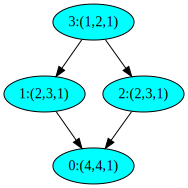

In [19]:
simple_fibration

In [20]:
simple_fibration.preimage(0)

{((2, 2), (2, 2)),
 ((3, 3), (3, 3)),
 ((3, 3), (2, 3)),
 ((3, 3), (2, 2)),
 ((2, 2), (3, 3)),
 ((2, 2), (2, 3)),
 ((2, 3), (2, 2)),
 ((2, 3), (2, 3)),
 ((2, 3), (3, 3))}

## Test CondensationGraph

In [21]:
from CondensationGraph import *

In [22]:
dag, mapping = CondensationGraph(D, discrete_flow)

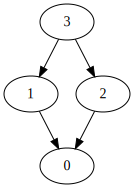

In [23]:
dag

In [24]:
mapping

defaultdict(int,
            {((1, 2), (1, 2)): 3,
             ((1, 2), (2, 3)): 1,
             ((2, 3), (1, 2)): 2,
             ((2, 3), (2, 3)): 0})

In [25]:
print(dag.adjacency_lists_)

{0: set([]), 1: set([0]), 2: set([0]), 3: set([1, 2])}


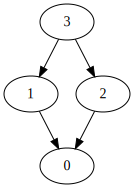

In [26]:
Poset(dag)

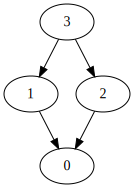

In [27]:
dag.transitive_reduction()

# Test ConnectionFibration

In [28]:
from Braids import *
from ConleyMorseFibration import *
from ConnectionFibration import *

In [29]:
simple_complex = CubicalComplex(CubicalGrid([[1,2,3],[1,2,3]]))
D = [ cell for cell in simple_complex.cells() if cell.dimension() == simple_complex.dimension()]
edges = defaultdict(set, { D[0] : [D[2], D[3]], D[1] : [D[2],D[3]]})
discrete_flow = lambda v : edges[v]
simple_fibration = ConleyMorseFibration(simple_complex, discrete_flow)
simple_connection_fibration = ConnectionFibration(simple_fibration)

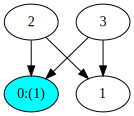

In [30]:
simple_connection_fibration

In [31]:
braid_skeleton = [ [1,4,1,4], [2,2,2,2], [3,3,3,3], [4,1,4,1]]
(complex, discrete_flow) = Braids(braid_skeleton)
fibration = ConleyMorseFibration(complex, discrete_flow)
connection_fibration = ConnectionFibration(fibration)

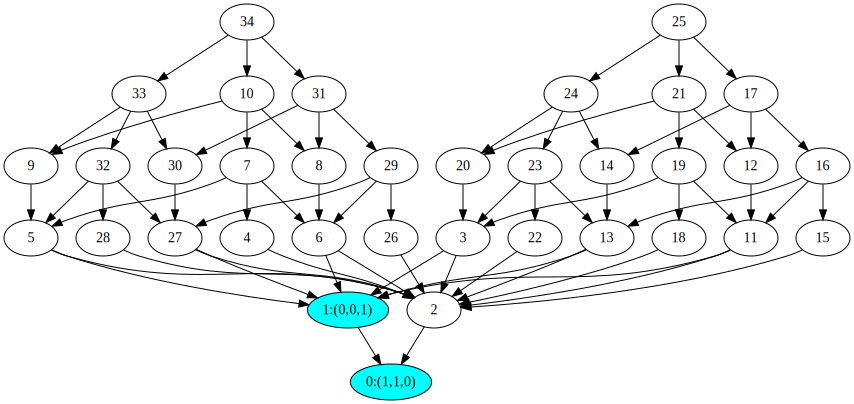

In [32]:
connection_fibration

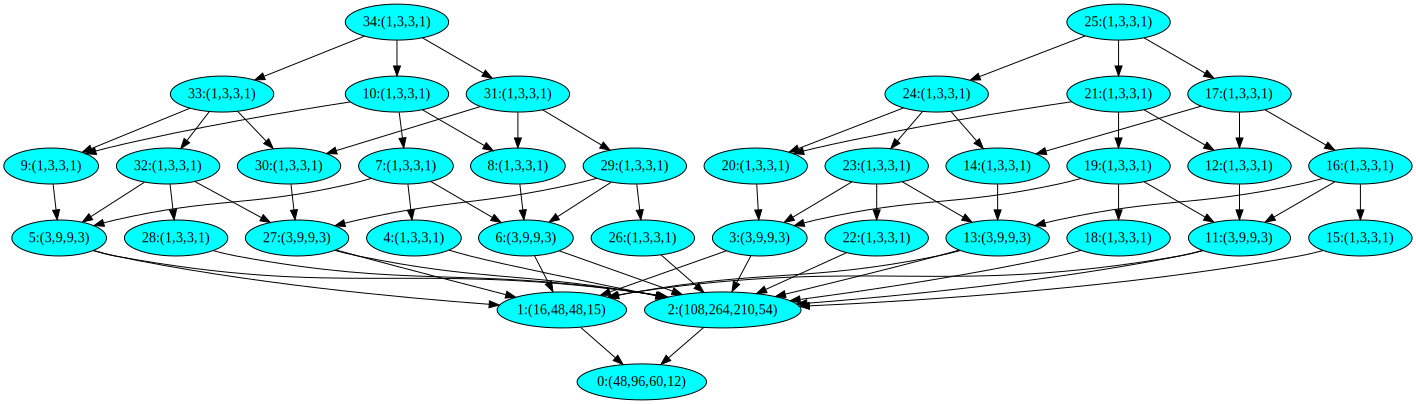

In [33]:
fibration

In [34]:
set([ cell for cell in fibration.preimage(1)])

{((2, 3), (1, 2), (1, 2)),
 ((2, 3), (1, 2), (2, 2)),
 ((2, 3), (1, 2), (1, 1)),
 ((2, 3), (1, 2), (2, 3)),
 ((1, 2), (2, 3), (2, 3)),
 ((1, 2), (1, 2), (2, 2)),
 ((1, 2), (1, 2), (1, 2)),
 ((1, 2), (1, 2), (2, 3)),
 ((1, 2), (1, 2), (1, 1)),
 ((1, 2), (2, 3), (1, 2)),
 ((1, 2), (2, 2), (2, 3)),
 ((1, 2), (2, 2), (1, 1)),
 ((1, 2), (2, 2), (2, 2)),
 ((1, 2), (2, 2), (1, 2)),
 ((1, 2), (1, 1), (1, 2)),
 ((1, 2), (1, 1), (1, 1)),
 ((1, 2), (1, 1), (2, 3)),
 ((1, 2), (1, 1), (2, 2)),
 ((1, 2), (2, 3), (1, 1)),
 ((1, 2), (2, 3), (2, 2)),
 ((2, 3), (1, 1), (1, 1)),
 ((2, 3), (1, 1), (2, 2)),
 ((2, 3), (4, 4), (3, 4)),
 ((2, 3), (4, 4), (2, 3)),
 ((2, 3), (3, 3), (4, 4)),
 ((2, 3), (4, 4), (3, 3)),
 ((2, 3), (2, 3), (4, 4)),
 ((2, 3), (2, 3), (2, 2)),
 ((2, 3), (2, 3), (2, 3)),
 ((2, 3), (2, 3), (3, 4)),
 ((2, 3), (2, 3), (1, 1)),
 ((2, 3), (2, 3), (3, 3)),
 ((2, 3), (2, 3), (1, 2)),
 ((2, 3), (3, 4), (4, 4)),
 ((2, 3), (3, 4), (3, 3)),
 ((3, 4), (3, 4), (3, 3)),
 ((3, 4), (3, 4), (3, 4)),
 

In [35]:
set([ cell for cell in fibration.preimage(2)])

{((-inf, 1), (-inf, 1), (4, inf)),
 ((4, inf), (1, 2), (3, 4)),
 ((2, 3), (1, 2), (4, inf)),
 ((2, 3), (1, 2), (inf, inf)),
 ((-inf, 1), (4, 4), (1, 1)),
 ((-inf, 1), (3, 3), (3, 4)),
 ((-inf, 1), (2, 2), (3, 3)),
 ((-inf, 1), (2, 2), (inf, inf)),
 ((-inf, 1), (3, 3), (1, 2)),
 ((-inf, 1), (3, 3), (2, 3)),
 ((-inf, 1), (3, 3), (4, 4)),
 ((-inf, 1), (3, 3), (4, inf)),
 ((-inf, 1), (3, 3), (3, 3)),
 ((-inf, 1), (2, 2), (4, 4)),
 ((-inf, 1), (3, 3), (2, 2)),
 ((-inf, 1), (3, 3), (1, 1)),
 ((-inf, 1), (-inf, 1), (4, 4)),
 ((-inf, 1), (-inf, 1), (inf, inf)),
 ((1, 2), (1, 2), (inf, inf)),
 ((1, 2), (1, 2), (4, inf)),
 ((1, 2), (2, 3), (4, inf)),
 ((-inf, 1), (2, 2), (3, 4)),
 ((1, 2), (-inf, 1), (3, 4)),
 ((-inf, 1), (inf, inf), (4, 4)),
 ((1, 2), (-inf, 1), (3, 3)),
 ((-inf, 1), (1, 1), (inf, inf)),
 ((-inf, 1), (4, 4), (4, 4)),
 ((-inf, 1), (inf, inf), (2, 2)),
 ((1, 2), (-inf, 1), (4, 4)),
 ((-inf, 1), (2, 2), (4, inf)),
 ((-inf, 1), (inf, inf), (4, inf)),
 ((-inf, 1), (4, 4), (3, 3)),
 

In [36]:
[ cell for cell in fibration.preimage(2) if cell.dimension() == 3]

[((1, 2), (4, inf), (-inf, 1)),
 ((4, inf), (-inf, 1), (4, inf)),
 ((3, 4), (4, inf), (1, 2)),
 ((4, inf), (-inf, 1), (1, 2)),
 ((2, 3), (-inf, 1), (3, 4)),
 ((4, inf), (-inf, 1), (3, 4)),
 ((1, 2), (-inf, 1), (3, 4)),
 ((1, 2), (4, inf), (1, 2)),
 ((3, 4), (4, inf), (-inf, 1)),
 ((4, inf), (2, 3), (-inf, 1)),
 ((4, inf), (3, 4), (1, 2)),
 ((-inf, 1), (4, inf), (-inf, 1)),
 ((-inf, 1), (3, 4), (4, inf)),
 ((3, 4), (1, 2), (4, inf)),
 ((3, 4), (3, 4), (-inf, 1)),
 ((-inf, 1), (3, 4), (2, 3)),
 ((-inf, 1), (4, inf), (3, 4)),
 ((1, 2), (-inf, 1), (4, inf)),
 ((2, 3), (4, inf), (1, 2)),
 ((4, inf), (-inf, 1), (-inf, 1)),
 ((1, 2), (1, 2), (4, inf)),
 ((4, inf), (1, 2), (1, 2)),
 ((-inf, 1), (2, 3), (3, 4)),
 ((2, 3), (-inf, 1), (4, inf)),
 ((-inf, 1), (4, inf), (2, 3)),
 ((4, inf), (-inf, 1), (2, 3)),
 ((-inf, 1), (1, 2), (3, 4)),
 ((4, inf), (1, 2), (3, 4)),
 ((4, inf), (3, 4), (-inf, 1)),
 ((1, 2), (3, 4), (-inf, 1)),
 ((3, 4), (-inf, 1), (3, 4)),
 ((2, 3), (4, inf), (-inf, 1)),
 ((1, 2)

In [37]:
[ cell for cell in fibration.preimage(0) if cell.dimension() == 3]

[((1, 2), (2, 3), (3, 4)),
 ((2, 3), (1, 2), (3, 4)),
 ((1, 2), (3, 4), (2, 3)),
 ((2, 3), (3, 4), (1, 2)),
 ((1, 2), (3, 4), (3, 4)),
 ((3, 4), (3, 4), (1, 2)),
 ((3, 4), (2, 3), (1, 2)),
 ((3, 4), (1, 2), (2, 3)),
 ((1, 2), (1, 2), (3, 4)),
 ((1, 2), (3, 4), (1, 2)),
 ((3, 4), (1, 2), (1, 2)),
 ((3, 4), (1, 2), (3, 4))]

In [38]:
# We also need to know the top cells surrounding a vertex
def closure(complex, cells):
    result = set()
    stack = list(cells)
    while stack:
      v = stack.pop()
      result.add(v)
      for u in complex.boundary(v):
        stack.append(u)
    return result

In [39]:
downset = set([ cell for cell in fibration.preimage(0)])

In [40]:
downset_closure = closure(fibration.complex(), downset)

In [41]:
[ cell for cell in downset_closure if cell not in downset ]

[]

In [42]:
print(len(downset_closure))

216


In [43]:
print(len(downset))

216


In [44]:
108-264+210-54

0

In [45]:
8-12+6-1

1